# [Finding a Learning Rate with Tensorflow 2](https://www.avanwyk.com/finding-a-learning-rate-in-tensorflow-2/)

In [1]:
import tensorflow as tf

In [2]:
# 當 library or module 改變，會自動重新載入
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()
x_train, x_valid = x_train / 255.0, x_valid / 255.0

x_train = x_train[..., tf.newaxis]
x_valid = x_valid[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(32)

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

def build_model():
    return tf.keras.models.Sequential([
        Conv2D(32, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])

In [5]:
from lr_finder import LRFinder

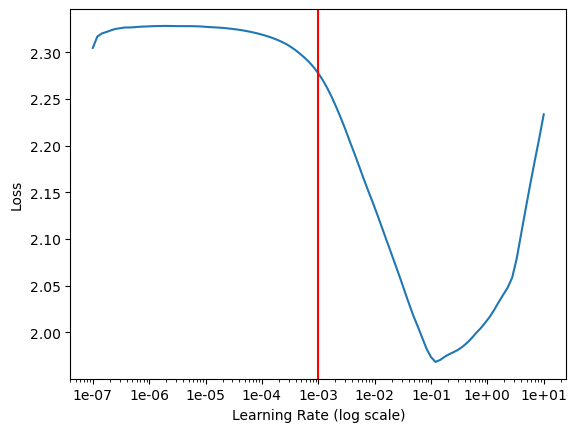

In [6]:
lr_finder = LRFinder()
model = build_model()
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy')
_ = model.fit(train_ds, epochs=5, callbacks=[lr_finder], verbose=False)
lr_finder.plot()

import matplotlib.pyplot as plt
plt.axvline(1e-3, c='r');

In [7]:
model.evaluate(valid_ds, verbose=False)

6.024172782897949

## 採用使最佳學習率

In [8]:
# lr should be chosen in a region where the loss is rapidly, but strictly decreasing. 
model = build_model() # reinitialize model
adam = tf.optimizers.Adam(1e-3)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
_ = model.fit(train_ds, validation_data=valid_ds, epochs=5, verbose=True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8078 - loss: 0.5436 - val_accuracy: 0.8854 - val_loss: 0.3133
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8985 - loss: 0.2814 - val_accuracy: 0.8975 - val_loss: 0.2741
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9140 - loss: 0.2326 - val_accuracy: 0.9081 - val_loss: 0.2509
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9255 - loss: 0.2002 - val_accuracy: 0.9054 - val_loss: 0.2617
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9354 - loss: 0.1739 - val_accuracy: 0.9155 - val_loss: 0.2536


In [10]:
model.evaluate(valid_ds, verbose=False)

[0.25364211201667786, 0.9154999852180481]